In [4]:
import numpy as np
import pandas as pd
import sys
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
seed=42
random.seed=seed
np.random.seed=seed
tf.seed=seed

In [10]:
import os
import cv2

In [6]:
for dirname,_,filenames in os.walk("Firesegmentation/Image"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

Firesegmentation/Image\Fire\Img_0.jpg
Firesegmentation/Image\Fire\Img_1.jpg
Firesegmentation/Image\Fire\Img_10.jpg
Firesegmentation/Image\Fire\Img_100.jpg
Firesegmentation/Image\Fire\Img_1000.jpg
Firesegmentation/Image\Fire\Img_10000.jpg
Firesegmentation/Image\Fire\Img_10001.jpg
Firesegmentation/Image\Fire\Img_10002.jpg
Firesegmentation/Image\Fire\Img_10003.jpg
Firesegmentation/Image\Fire\Img_10004.jpg
Firesegmentation/Image\Fire\Img_10005.jpg
Firesegmentation/Image\Fire\Img_10006.jpg
Firesegmentation/Image\Fire\Img_10007.jpg
Firesegmentation/Image\Fire\Img_10008.jpg
Firesegmentation/Image\Fire\Img_10009.jpg
Firesegmentation/Image\Fire\Img_1001.jpg
Firesegmentation/Image\Fire\Img_10010.jpg
Firesegmentation/Image\Fire\Img_10011.jpg
Firesegmentation/Image\Fire\Img_10012.jpg
Firesegmentation/Image\Fire\Img_10013.jpg
Firesegmentation/Image\Fire\Img_10014.jpg
Firesegmentation/Image\Fire\Img_10015.jpg
Firesegmentation/Image\Fire\Img_10016.jpg
Firesegmentation/Image\Fire\Img_10017.jpg
Fireseg

Firesegmentation/Image\Not_Fire\Img_10455.jpg
Firesegmentation/Image\Not_Fire\Img_10456.jpg
Firesegmentation/Image\Not_Fire\Img_10457.jpg
Firesegmentation/Image\Not_Fire\Img_10458.jpg
Firesegmentation/Image\Not_Fire\Img_10460.jpg
Firesegmentation/Image\Not_Fire\Img_10468.jpg
Firesegmentation/Image\Not_Fire\Img_10600.jpg
Firesegmentation/Image\Not_Fire\Img_10968.jpg
Firesegmentation/Image\Not_Fire\Img_10985.jpg
Firesegmentation/Image\Not_Fire\Img_10986.jpg
Firesegmentation/Image\Not_Fire\Img_11012.jpg
Firesegmentation/Image\Not_Fire\Img_13237.jpg
Firesegmentation/Image\Not_Fire\Img_13280.jpg
Firesegmentation/Image\Not_Fire\Img_13425.jpg
Firesegmentation/Image\Not_Fire\Img_14182.jpg
Firesegmentation/Image\Not_Fire\Img_15140.jpg
Firesegmentation/Image\Not_Fire\Img_15144.jpg
Firesegmentation/Image\Not_Fire\Img_1515.jpg
Firesegmentation/Image\Not_Fire\Img_15365.jpg
Firesegmentation/Image\Not_Fire\Img_15366.jpg
Firesegmentation/Image\Not_Fire\Img_15367.jpg
Firesegmentation/Image\Not_Fire\Img

In [7]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids
        self.path = path
        self.batch_size = batch_size
        self.image_size = image_size
        self.on_epoch_end()
        
    def __load__(self, id_name):
        ## Path
        image_path = os.path.join("Firesegmentation/Image/Fire", id_name)
        mask_path = os.path.join("Firesegmentation/Segmentation_Mask/Fire", id_name)
        # image_path = os.path.join(self.path, id_name, "images", id_name) + ".png"
        # mask_path = os.path.join(self.path, id_name, "masks/")
        # all_masks = os.listdir(mask_path)
        
        ## Reading Image
        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
        
        mask = np.zeros((self.image_size, self.image_size, 1))
        _mask_image = cv2.imread(mask_path, -1)
        _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size))
        _mask_image = np.expand_dims(_mask_image, axis=-1)
        mask = np.maximum(mask, _mask_image)
        image = image/255.0
        
        mask = mask/255.0
        
        return image,mask
    def __getitem__(self,index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]
        
        image = []
        mask  = []
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            mask.append(_mask)
            
        image = np.array(image)
        mask  = np.array(mask)
        
        return image, mask
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))

In [8]:
image_size = 64
#image_size = 128
train_path = "Firesegmentation/Image/Fire"
epochs = 1
# epochs = 10
batch_size = 10

## Training Ids
train_ids = next(os.walk(train_path))[2]

## Validation Data Size
val_data_size = 100

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]
print(valid_ids)
print(train_ids)

['Img_0.jpg', 'Img_1.jpg', 'Img_10.jpg', 'Img_100.jpg', 'Img_1000.jpg', 'Img_10000.jpg', 'Img_10001.jpg', 'Img_10002.jpg', 'Img_10003.jpg', 'Img_10004.jpg', 'Img_10005.jpg', 'Img_10006.jpg', 'Img_10007.jpg', 'Img_10008.jpg', 'Img_10009.jpg', 'Img_1001.jpg', 'Img_10010.jpg', 'Img_10011.jpg', 'Img_10012.jpg', 'Img_10013.jpg', 'Img_10014.jpg', 'Img_10015.jpg', 'Img_10016.jpg', 'Img_10017.jpg', 'Img_10018.jpg', 'Img_10019.jpg', 'Img_1002.jpg', 'Img_10020.jpg', 'Img_10021.jpg', 'Img_10022.jpg', 'Img_10023.jpg', 'Img_10024.jpg', 'Img_10025.jpg', 'Img_10026.jpg', 'Img_10027.jpg', 'Img_10028.jpg', 'Img_10029.jpg', 'Img_1003.jpg', 'Img_10030.jpg', 'Img_10031.jpg', 'Img_10032.jpg', 'Img_10033.jpg', 'Img_10034.jpg', 'Img_10035.jpg', 'Img_10036.jpg', 'Img_10037.jpg', 'Img_10038.jpg', 'Img_10039.jpg', 'Img_1004.jpg', 'Img_10040.jpg', 'Img_10041.jpg', 'Img_10042.jpg', 'Img_10043.jpg', 'Img_10044.jpg', 'Img_10045.jpg', 'Img_10046.jpg', 'Img_10047.jpg', 'Img_10048.jpg', 'Img_10049.jpg', 'Img_1005.jpg'

In [11]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
print(x.shape, y.shape)

(10, 64, 64, 3) (10, 64, 64, 1)


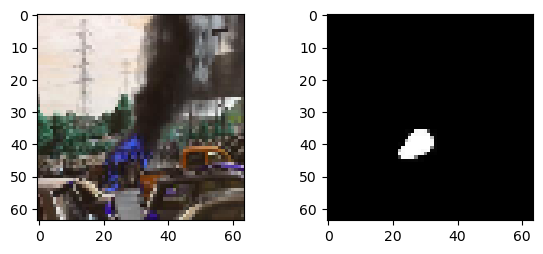

In [13]:
r = random.randint(0, len(x)-1)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")

In [14]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [15]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0])  # 128 --> 64
    c2, p2 = down_block(p1, f[1])  # 64  --> 32
    c3, p3 = down_block(p2, f[2])  # 32  --> 16
    c4, p4 = down_block(p3, f[3])  # 16  --> 8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3])  # 8  --> 16
    u2 = up_block(u1, c3, f[2])  # 16 --> 32
    u3 = up_block(u2, c2, f[1])  # 32 --> 64
    u4 = up_block(u3, c1, f[0])  # 64 --> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [16]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 16)           448       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 16)           2320      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [17]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps,
                    validation_steps=valid_steps, epochs=epochs)

C:\Users\anupa\AppData\Local\Temp\ipykernel_8240\306985398.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps,


2736/2736 [==============================] - 853s 311ms/step - loss: 0.0429 - acc: 0.9708 - val_loss: 0.0164 - val_acc: 0.9802


In [18]:
## Save the Weights
model.save_weights("UNetW.h5")

## Dataset for prediction
x, y = valid_gen.__getitem__(2)
result = model.predict(x)

result = result > 0.5

1/1 [==============================] - 0s 219ms/step


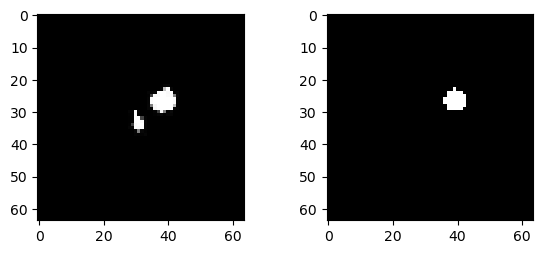

In [19]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

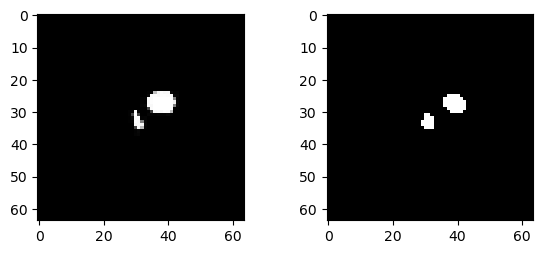

In [20]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[1]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[1]*255, (image_size, image_size)), cmap="gray")

In [21]:

from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your trained U-Net model


# Load your test dataset (images and corresponding ground truth masks)
X_test,y_test=valid_gen.__getitem__(0)

# Preprocess your test data (normalize, resize, etc.) to match the model's input size
# For example, you can use tf.image.resize() to resize images.

# Predict masks using the U-Net model
y_pred = model.predict(X_test)

# Threshold the predicted masks if they are probability maps
# You can use a simple threshold like 0.5
y_pred_thresholded = (y_pred > 0.5).astype(np.uint8)

# Calculate the accuracy using a suitable metric (IoU or Dice Coefficient)
# You can also use sklearn's accuracy_score for pixel-wise accuracy
# or confusion_matrix to get more detailed metrics
iou = []
dice = []

for i in range(len(X_test)):
    intersection = np.logical_and(y_test[i], y_pred_thresholded[i])
    union = np.logical_or(y_test[i], y_pred_thresholded[i])
    iou_score = np.sum(intersection) / np.sum(union)
    dice_score = (2 * np.sum(intersection)) / (np.sum(y_test[i]) + np.sum(y_pred_thresholded[i]))
    iou.append(iou_score)
    dice.append(dice_score)

# Calculate the mean IoU and Dice Coefficient
mean_iou = np.mean(iou)
mean_dice = np.mean(dice)

print(f"Mean IoU: {mean_iou}")
print(f"Mean Dice Coefficient: {mean_dice}")

# Optionally, you can print confusion matrix or other metrics
# cm = confusion_matrix(y_test.flatten(), y_pred_thresholded.flatten())
# print("Confusion Matrix:")
# print(cm)


1/1 [==============================] - 0s 100ms/step
Mean IoU: 0.2841127425613368
Mean Dice Coefficient: 0.6184476902251438
